In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


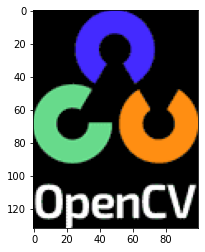

In [8]:
img = cv2.imread("../images/logo.png")
plt.imshow(img)

##  上面的颜色不对是因为没有变化通道，可以看第一章

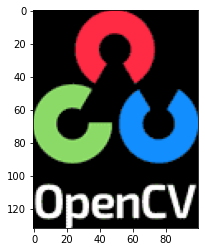

In [9]:
img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_new)

In [11]:
# height, width, channel
height,width,channel = img.shape

In [12]:
print(height,width,channel)

132 100 3


##  1. 图像放大、缩小
cv2.resize()

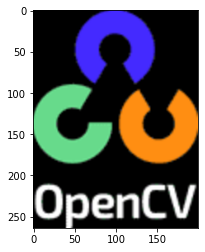

In [13]:
resize_img = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_LINEAR)
plt.imshow(resize_img)

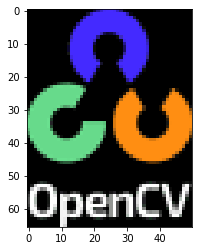

In [14]:
# cv2.resize() # 缩小, 扩大课缩小的两种方式啦 一个是传size的元组，一个是 传fx，fy的比例

small_img = cv2.resize(img, None,fx=0.5,fy=0.5,interpolation=cv2.INTER_LINEAR)
plt.imshow(small_img)

## 2.图像平移

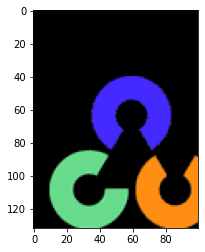

In [20]:

# 1 平移 cv2.warpAffine()
height,width = img.shape[:2]
M1 = np.float32([[1,0,10],[0,1,40]]) # 平移矩阵， 图像向右平移10个像素，向下移动40个像素
move_img = cv2.warpAffine(img, M1,(width,height))
plt.imshow(move_img)

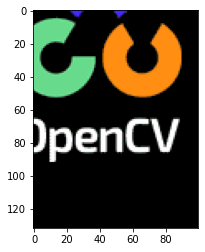

In [21]:
# 1 平移 cv2.warpAffine()
height,width = img.shape[:2]
M1 = np.float32([[1,0,-10],[0,1,-40]]) # 平移矩阵， 图像向左平移10个像素，向上移动40个像素
move_img = cv2.warpAffine(img, M1,(width,height))
plt.imshow(move_img)

## 3. 图像旋转

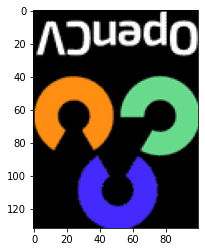

In [22]:
height, width = img.shape[:2]
center = (width//2.0, height//2.0) # 渲染的中心
M3 = cv2.getRotationMatrix2D(center, 180 , 1) # 1 表示旋转过程中没有缩放
rotation_img = cv2.warpAffine(img,M3, (width, height))
plt.imshow(rotation_img)

## 4 图像仿射变换
就是一个图片的拉伸,旋转,扭曲的变化,通过矩阵乘法实现的,就是两个空间矩阵的作用,


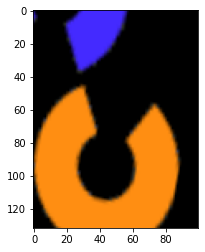

In [23]:
# cv2.getAffineTransform(p1,p2)
p1 = np.float32([[120,35],[215,45],[135,120]])
p2 = np.float32([[135,45],[300,110],[130,230]])
M4 = cv2.getAffineTransform(p1,p2) # 计算一个变换矩阵
trans_img = cv2.warpAffine(img,M4, (width,height))
plt.imshow(trans_img)

## 5.图像的裁剪

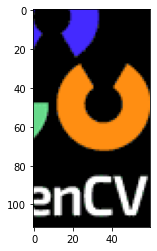

In [25]:
crop_img = img[20:140, 40:200]
plt.imshow(crop_img)

## 6 位运算(AND, OR, XOR)